# 데이터 로드

데이터 출처(Kaggle): https://www.kaggle.com/datasets/shivam2503/diamonds

# Clarity, Cut, Color의 구분에 대한 정의

### Carrot

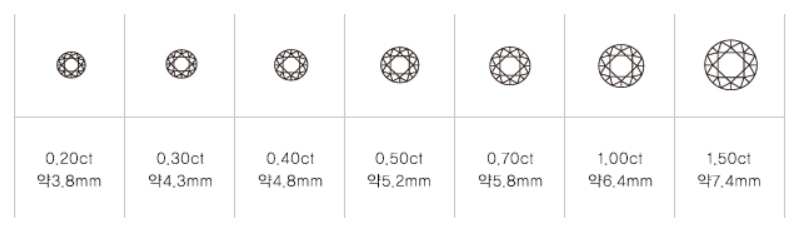

### Color

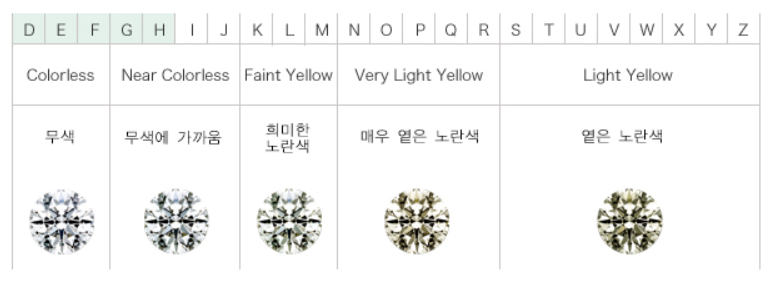

### Clarity

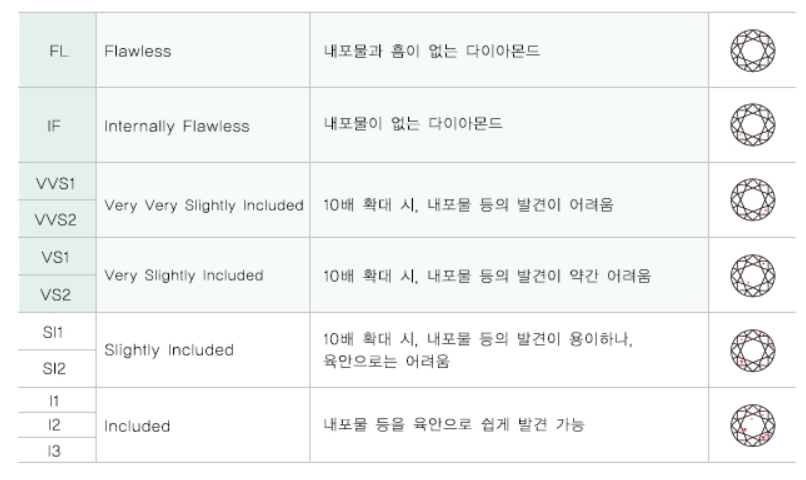

### summary

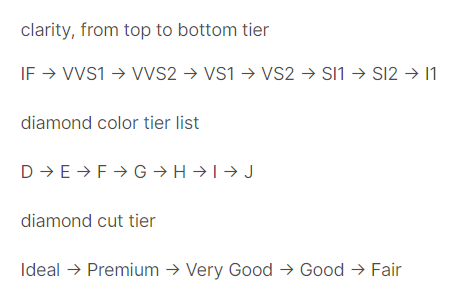

# 데이터 전처리

In [13]:
# Unnamed : 0 컬럼 제거
import pandas as pd
data = pd.read_csv('diamonds.csv')
# 문자열 정수로 변환 등,,
data = data.iloc[:,1:]
data = data.replace({'cut':{'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, 'color':{'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, 'clarity':{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}})

C:\Users\humming\AppData\Local\Temp\ipykernel_14216\4196973287.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'cut':{'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, 'color':{'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, 'clarity':{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}})


In [30]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


# 시각화(EDA)

<Axes: >

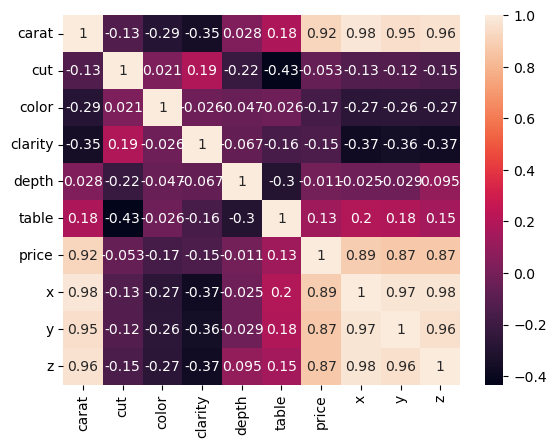

In [140]:
# 다양한 시각화 기법을 활용하여 데이터 상태 확인

import matplotlib.pyplot as plt 
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

# 선택) 이상치 확인 및 처리

In [86]:
# x, y, z값에 0이 있는지 확인
data=data[~data['z'].isin([0])]

# Train, Test 분리 및 학습

In [534]:
# LinearRegression() 모델 학습
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
8917,0.80,3,6,5,62.4,54.0,5.98,5.94,3.72
20172,1.06,5,4,6,60.1,57.0,6.61,6.66,3.99
2562,0.79,5,5,3,60.8,55.0,5.98,6.05,3.66
28447,0.31,5,3,7,60.9,56.0,4.40,4.42,2.69
1661,0.90,3,1,4,63.1,59.0,6.09,6.05,3.83
...,...,...,...,...,...,...,...,...,...
19418,1.24,3,6,3,61.7,59.0,6.85,6.89,4.24
39909,0.50,5,6,2,62.6,56.0,5.05,5.11,3.18
49118,0.56,5,4,6,61.6,55.0,5.32,5.35,3.28
1787,0.76,5,3,3,61.4,55.0,5.82,5.90,3.60


In [147]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

(10784,)

In [ ]:
lr.predict(X_test).shape

In [148]:
# KNeighborsRegressor() 모델 학습
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()
kr.fit(X_train, y_train)


KNeighborsRegressor()

In [98]:
kr.score(X_test, y_test)

0.9548133802591077

### 모델 평가, R2 Score 출력


In [104]:
y_pred=lr.predict(X_test)

In [149]:
from sklearn.metrics import r2_score

print(r2_score(y_test, lr.predict(X_test)))
print(r2_score(y_test, kr.predict(X_test)))

0.9022931483362311
0.9555642882162002


### 심화) 릿지나 라쏘 규제 활용

In [132]:
from sklearn.linear_model import Lasso, Ridge
model_l = Lasso(alpha = 0.1)
model_r = Ridge(alpha = 0.1)

In [133]:
model_l.fit(X_train, y_train)
model_r.fit(X_train, y_train)

Ridge(alpha=0.1)

In [135]:
model_r.score(X_test, y_test)

0.9063642451404664

In [134]:
model_l.score(X_test, y_test)

0.9063594969307864

# 테스트용 코드

In [184]:
# 입력 : 0.23 Good(숫자) E(숫자) VS1(숫자) 56.9 65 4.05 4.07 2.31
# 0.23	2	6	5	56.9	65.0	327	4.05	4.07	2.31
# Price : 327

data_list = []

while True:
    data_carat = input('1. Diamond의 carat을 입력하세요 : ')
    if data_carat.isalpha():
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    if data_carat=='' or data_carat==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif data_carat == 0 or data_carat == 0.0:
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(float(data_carat))

while True:
    data_cut = input('2. Diamond의 cut 값을 0~4의 숫자로 입력하세요 (입력기준 : (1: Fair, 2: Good, 3: Very Good, 4: Premium, 5: Ideal): ')
    if data_cut.isalpha() or data_cut=='' or data_cut==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif int(data_cut) > 4:
        print('정상적인 입력 구간이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(int(data_cut))

while True:
    data_color = input('3. Diamond의 color 값을 0~6의 숫자로 입력하세요 (입력기준 : (7: D, 6: E, 5: F, 4: G, 3: H, 2: I, 1: J): ')
    if data_color.isalpha() or data_color=='' or data_color==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif int(data_color) > 7:
        print('정상적인 입력 구간이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(int(data_color))

while True:
    data_clarity = input('4. Diamond의 clarity 값을 0~7의 숫자로 입력하세요 (입력기준 : (I1:1, SI2:2, SI1:3, VS2:4, VS1:5, VVS2:6, VVS1:7, IF:8):')
    if data_clarity.isalpha() or data_clarity=='' or data_clarity==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif int(data_clarity) > 8:
        print('정상적인 입력 구간이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(int(data_clarity))


while True:
    data_depth = input('5. Diamond의 depth 값을 입력하세요 : ')
    if data_depth.isalpha() or data_depth=='' or data_depth==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif data_depth == 0 or data_depth == 0.0:
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(float(data_depth))

while True:
    data_table = input('6. Diamond의 table 값을 입력하세요 : ')
    if data_table.isalpha() or data_table=='' or data_table==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif data_table == 0 or data_table == 0.0:
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(float(data_table))

while True:
    data_x = input('7. Diamond의 x 값을 입력하세요 : ')
    if data_x.isalpha() or data_x=='' or data_x==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif data_x == 0 or data_x == 0.0:
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(float(data_x))

while True:
    data_y = input('8. Diamond의 y 값을 입력하세요 : ')
    if data_y.isalpha() or data_y=='' or data_y==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif data_y == 0 or data_y == 0.0:
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(float(data_y))

while True:
    data_z = input('9. Diamond의 z 값을 입력하세요 : ')
    if data_z.isalpha() or data_z=='' or data_z==' ':
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    elif data_z == 0 or data_z == 0.0:
        print('정상적인 입력이 아닙니다. 다시 입력해 주세요...')
    else:
        break
data_list.append(float(data_z))
test_data = [data_list]
print(test_data)
preds_data = model_l.predict(test_data)
print('입력한 데이터에 대한 KNN 모델 다이아몬드 예측 가격은 ${0:.3f} 입니다.'.format(preds_data[0]))
preds_data = model_r.predict(test_data)
print('입력한 데이터에 대한 KNN 모델 다이아몬드 예측 가격은 ${0:.3f} 입니다.'.format(preds_data[0]))


[[0.23, 2, 6, 5, 56.9, 65.0, 4.05, 4.07, 2.31]]
입력한 데이터에 대한 KNN 모델 다이아몬드 예측 가격은 $242.907 입니다.
입력한 데이터에 대한 KNN 모델 다이아몬드 예측 가격은 $245.640 입니다.


c:\Users\humming\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\humming\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# 심화) 딥러닝으로 회귀 모델 구현

In [583]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.metrics import
model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
    ])
from tensorflow.keras.optimizers import Adam
model.compile(loss='mse', optimizer=Adam(learning_rate=0.0005), metrics=['mae'])




In [535]:
X_train.astype(float)
y_train.astype(float)
X_test.astype(float)
y_test.astype(float)

45600     1690.0
190       2777.0
40709     1159.0
14517     5864.0
25433    14184.0
          ...   
40354     1129.0
9712       590.0
22702      630.0
32569      800.0
46343     1758.0
Name: price, Length: 10784, dtype: float64

In [585]:
model.fit(X_train, y_train,validation_split=0.2, epochs=600 , batch_size=2048)

Epoch 1/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1409276.5000 - mae: 699.4354 - val_loss: 893203.3750 - val_mae: 542.1591
Epoch 2/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1377068.0000 - mae: 713.9745 - val_loss: 888896.5000 - val_mae: 542.5430
Epoch 3/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1439585.1250 - mae: 709.2977 - val_loss: 890717.8125 - val_mae: 541.4060
Epoch 4/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1511943.7500 - mae: 717.4436 - val_loss: 897575.9375 - val_mae: 542.0909
Epoch 5/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1368378.3750 - mae: 706.6795 - val_loss: 881777.3125 - val_mae: 539.1235
Epoch 6/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1276434.7500 - mae: 701.5550 - val_loss: 882393.2500 - val_mae: 539.4470
Epoch 7/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1969701.6250 - mae: 715.8819 - val_loss: 875090.6875 - val_mae: 535.4182
Epoch 8/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1730668.5000 - m

In [536]:
y.iloc[2:3]

2    327
Name: price, dtype: int64

In [396]:
X.iloc[2:3]


,carat,cut,color,clarity,depth,table,x,y,z
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31


In [525]:
test_data = X.iloc[53919:]

preds_data = model.predict(test_data)

preds_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[2476.639]], dtype=float32)

In [586]:
x=4444
j=20
test_data = X.iloc[x:x+j]

preds_data = model.predict(test_data)
for i in range(j):
    print(preds_data[i],y.iloc[x+i],':',preds_data[i][0]-y.iloc[x+i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[3556.7126] 3618 : -61.287353515625
[3545.8066] 3618 : -72.193359375
[3366.7393] 3618 : -251.2607421875
[5267.0566] 3618 : 1649.056640625
[3308.0884] 3618 : -309.91162109375
[3463.8962] 3619 : -155.103759765625
[3281.0872] 3619 : -337.912841796875
[4673.9507] 3619 : 1054.95068359375
[3286.9973] 3619 : -332.002685546875
[3790.7488] 3620 : 170.748779296875
[3846.798] 3620 : 226.798095703125
[3711.048] 3620 : 91.048095703125
[4150.361] 3620 : 530.36083984375
[3677.1533] 3620 : 57.1533203125
[4118.468] 3620 : 498.4677734375
[3612.6768] 3620 : -7.3232421875
[3738.0889] 3620 : 118.0888671875
[4254.972] 3621 : 633.97216796875
[3227.1375] 3621 : -393.862548828125
[4374.434] 3622 : 752.43408203125


In [393]:
preds_data

array([[2673.1702]], dtype=float32)